# D208 - Predictive Modeling Performance Assessment Task 2

Assignment Completed by Favio Conde and Submitted July 25, 2023 for WGU - MSDA
</br>

### Table of Contents

#### Part I: Research Question
 
 A1: Research Question
 
 A2: Goals
 
#### Part II: Method Justification

 B1: Summary of Assumption
 
 B2: Tool Benfits
 
 B3: Appropriate Technique
 
#### Part III: Data Preparation
 
 C1: Data Cleaning
 
 C2: Summary Statistics
 
 C3: Visualizations
 
 C4: Data Transformation
 
 C5: Prepared Data Set
 
#### Part IV:  Model Comparison and Analysis
 
 D1: Initial Model

 D2: Justification of Model Reduction
 
 D3: Reduced Logistic Regression Model
 
 E1: Model Comparison

 E2: Output and Calculations
 
 E3: Code
 
 #### Part V: Data Summary and Implications
 
 F1. Results
 
 F2. Recommendations
 
 #### Part VI: Demonstration
 
 G. Provide a Pinopto Video Recording
 
 H. Third-Party Code Reference
 
 I. Sources

### PART I: RESEARCH QUESTION

#### A1. Research Question

What variables in the data set have a correlations with the readmission of patients so that the hospital can better determine if readmission can be predicted?

#### A2. Goals

The goal of the analysis is to determine what factors affect whether a patient is readmitted or not.

### PART II: METHOD JUSTIFICATION

#### B1. Summary of Assumption

The logistic regression model has several assumption, which include (Vishalmendekarhere, 2021):

<ul>
    <li>The predicted values are limited to a range of nominal values.</li>
    <li>The model predicts the probability of a certain outcome rather than the outcome itself.</li>
    <li>The model requires a large sample size.</li>
    <li>The model assumes that there is little to no multicollinearity amongst the independent variables</li>
</ul>

#### B2. Tool Benefits

To clean the data, I used Python because it handles large sets of data really well and it has many libraries that aid in efficiently analyzing data.  Python is extremely efficient in predictive analytics and statistics.

For the logistic regression analysis I used the following libraries:

<ul>
    <li>NumPy: used to perform a number of mathematical operations on arrays</li>
    <li>Pandas: used for importing data sets into data frames and allows data cleaning, exploration and manipulation of data sets</li>
    <li>Seaborn: used to make visualizations</li>
    <li>Matplotlib: used to make visualizations</li>
    <li>Statsmodels: used to estimate statistical models and perform test</li>
    <li>Statemodels.graphics.mosaicplot: used to create the moscaic plot</li>
</ul>

#### B3. Appropriate Technique

Based on the independent variable being a categorical variable, a logical regression is the appropriate technique to use for predicting the probability of a categorical occurring.  This technique uses two or more explanatory variables to predict the target variable.  Since the target variable looks at whether the patient was readmitted, the model aims to determine the probability that a patient is readmitted to the hospital.

### PART III: DATA PREPARATION

#### C1. Data Cleaning

Regression analysis is sensitive to outliers so it was important to clean the data.  

First, I reviewed the data types to assess if value types seemed to be accurate.  Next, I checked for null or duplicate values.  I did not find any null or duplicate values, so I did not treat any.

For my analysis, I decided to keep the following categorical variables:

<ul>
    <li>Anxiety</li>
    <li>Arthritis</li>
    <li>BackPain</li>
    <li>Complication_risk</li>
    <li>Diabetes</li>
    <li>Gender</li>
    <li>HighBlood</li>
    <li>Hyperlipidemia</li>
    <li>Marital</li>
    <li>Overweight</li>
    <li>Stroke</li>
</ul>

For my analysis, I decided to  keep the following continuous variables:

<ul>
    <li>Additional_charges</li>
    <li>Doc_visits</li>
    <li>Initial_days</li>
    <li>TotalCharge</li>
</ul>

The reason I'm selecting these categorical and continuous variables is that I feel that they may impact whether a patient is readmitted or not.




I observed outliers in 'Additional_charges'.  Since regression analysis is sensitive to outliers, I have decided to remove 'Additional_charges' from my selected explanatory variables.  Since I removed the only independent variable with outliers, I did not treat the outliers.

In [1]:
# Importing packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

In [2]:
# Importing medical_clean.csv file into Jupyter
df = pd.read_csv('C:/Users/Favio/Documents/Education/WGU/MSDA/D208/PA/Files/medical_clean.csv')
df.head()

,CaseOrder,Customer_id,Interaction,UID,City,State,County,Zip,Lat,Lng,...,TotalCharge,Additional_charges,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
0,1,C412403,8cd49b13-f45a-4b47-a2bd-173ffa932c2f,3a83ddb66e2ae73798bdf1d705dc0932,Eva,AL,Morgan,35621,34.34960,-86.72508,...,3726.702860,17939.403420,3,3,2,2,4,3,3,4
1,2,Z919181,d2450b70-0337-4406-bdbb-bc1037f1734c,176354c5eef714957d486009feabf195,Marianna,FL,Jackson,32446,30.84513,-85.22907,...,4193.190458,17612.998120,3,4,3,4,4,4,3,3
2,3,F995323,a2057123-abf5-4a2c-abad-8ffe33512562,e19a0fa00aeda885b8a436757e889bc9,Sioux Falls,SD,Minnehaha,57110,43.54321,-96.63772,...,2434.234222,17505.192460,2,4,4,4,3,4,3,3
3,4,A879973,1dec528d-eb34-4079-adce-0d7a40e82205,cd17d7b6d152cb6f23957346d11c3f07,New Richland,MN,Waseca,56072,43.89744,-93.51479,...,2127.830423,12993.437350,3,5,5,3,4,5,5,5
4,5,C544523,5885f56b-d6da-43a3-8760-83583af94266,d2f0425877b10ed6bb381f3e2579424a,West Point,VA,King William,23181,37.59894,-76.88958,...,2113.073274,3716.525786,2,1,3,3,5,3,4,3


In [3]:
# Checking the shape of df
df.shape

(10000, 50)

In [4]:
# Checking value types for each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 50 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CaseOrder           10000 non-null  int64  
 1   Customer_id         10000 non-null  object 
 2   Interaction         10000 non-null  object 
 3   UID                 10000 non-null  object 
 4   City                10000 non-null  object 
 5   State               10000 non-null  object 
 6   County              10000 non-null  object 
 7   Zip                 10000 non-null  int64  
 8   Lat                 10000 non-null  float64
 9   Lng                 10000 non-null  float64
 10  Population          10000 non-null  int64  
 11  Area                10000 non-null  object 
 12  TimeZone            10000 non-null  object 
 13  Job                 10000 non-null  object 
 14  Children            10000 non-null  int64  
 15  Age                 10000 non-null  int64  
 16  Incom

<b>Checking for null values in the data set</b>

In [5]:
# Checking for null values
df.isnull().sum()

CaseOrder             0
Customer_id           0
Interaction           0
UID                   0
City                  0
State                 0
County                0
Zip                   0
Lat                   0
Lng                   0
Population            0
Area                  0
TimeZone              0
Job                   0
Children              0
Age                   0
Income                0
Marital               0
Gender                0
ReAdmis               0
VitD_levels           0
Doc_visits            0
Full_meals_eaten      0
vitD_supp             0
Soft_drink            0
Initial_admin         0
HighBlood             0
Stroke                0
Complication_risk     0
Overweight            0
Arthritis             0
Diabetes              0
Hyperlipidemia        0
BackPain              0
Anxiety               0
Allergic_rhinitis     0
Reflux_esophagitis    0
Asthma                0
Services              0
Initial_days          0
TotalCharge           0
Additional_charg

<b>Checking for duplicates in the data set</b>

In [6]:
# Checking for duplicates in data
df.duplicated().value_counts()

False    10000
dtype: int64

<b>Checking for outliers in all quantitative variables using box plots</b>

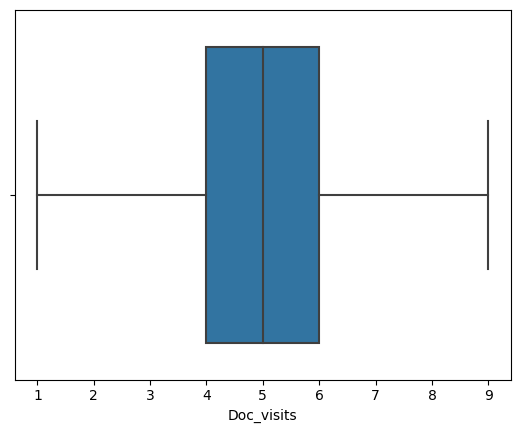

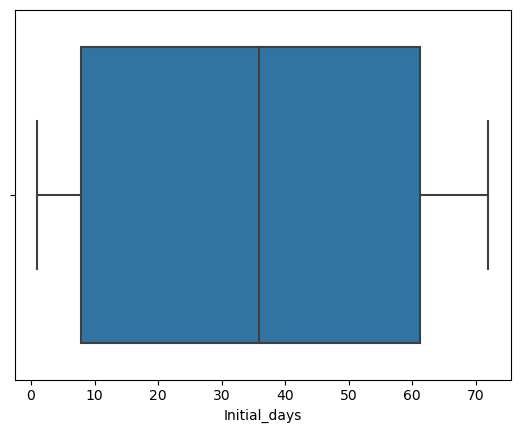

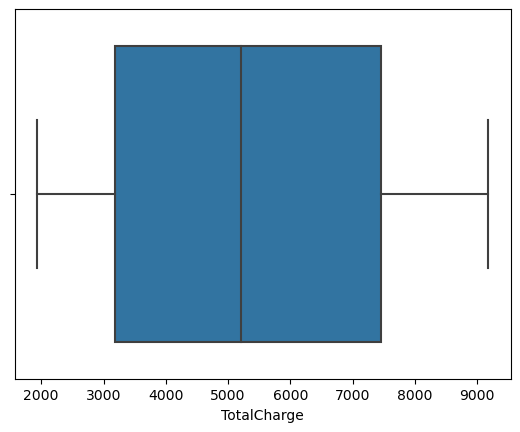

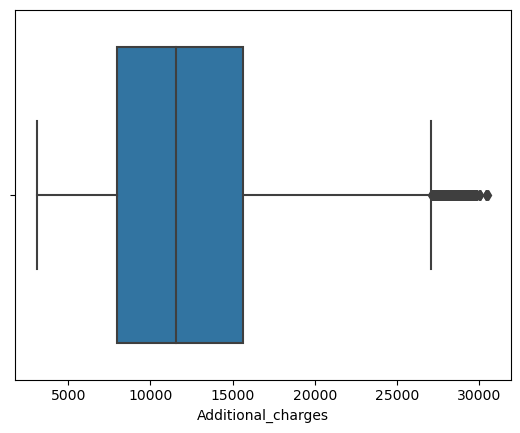

In [7]:
# Creating num_var variable to filter out the continuous variables I have selected for the analysis
num_var = ['Doc_visits', 'Initial_days', 'TotalCharge', 'Additional_charges']

for col in num_var:
    sns.boxplot(data=df, x=col)
    plt.show()

For 'Doc_visits', 'Initial_days', and 'TotalCharge', the plots show a normal distribution with no outliers, which is ideal for regression analysis.

The 'Additional_charges' plot shows a right skew with many outliers.  As a result, I have decided to drop this from my numeric explanatory variables.

#### C2. Summary Statistics

For the summary statistics, I am performing the analysis on only the numeric variables that I will be using in my initial model.  Those incude 'Doc_visits', 'Initial_days', 'TotalCharge', and 'Additional_charges'.

In [8]:
# Dropping 'Additional_charges' from num_var variable to run summary statistics on remaining selected continuous variables
num_var.remove('Additional_charges')
df[num_var].describe().T

,count,mean,std,min,25%,50%,75%,max
Doc_visits,10000.0,5.012200,1.045734,1.000000,4.000000,5.000000,6.00000,9.00000
Initial_days,10000.0,34.455299,26.309341,1.001981,7.896215,35.836244,61.16102,71.98149
TotalCharge,10000.0,5312.172769,2180.393838,1938.312067,3179.374015,5213.952000,7459.69975,9180.72800


The summary statistic provides a lot of information relating to the independent continuous variables in the dataset.

Below is a description of each column:
<ul>
    <li>count: shows the count for each variable</li>
    <li>mean: shows the average for each variable, which is calculated by summing all of the values and dividing by the count</li>
    <li>std: shows the standard deviation for each variable, which tells us how disbursed the data is related to the mean of the variable</li>
    <li>min: shows the minimum value for each variable</li>
    <li>25%: shows the value where 25% of the ordered data falls under</li>
    <li>50%: shows the value where 50% of the ordered data falls under</li>
    <li>75%: shows the value where 75% of the ordered data falls under</li>
    <li>max: shows the maximum value for each variable</li>
</ul>

In [9]:
# Creating cat_var variable to filter out the categorical variables I have selected for the analysis
cat_var = ['Anxiety', 'Arthritis', 'BackPain', 'Complication_risk', 'Diabetes', 'Gender', 'HighBlood', 'Hyperlipidemia', 'Marital', 'Overweight', 'Stroke']

for col in cat_var:
    print(f'{col} Data')
    results = df[col].value_counts(normalize=True)*100
    print(results)
    print('-'*100)

Anxiety Data
No     67.85
Yes    32.15
Name: Anxiety, dtype: float64
----------------------------------------------------------------------------------------------------
Arthritis Data
No     64.26
Yes    35.74
Name: Arthritis, dtype: float64
----------------------------------------------------------------------------------------------------
BackPain Data
No     58.86
Yes    41.14
Name: BackPain, dtype: float64
----------------------------------------------------------------------------------------------------
Complication_risk Data
Medium    45.17
High      33.58
Low       21.25
Name: Complication_risk, dtype: float64
----------------------------------------------------------------------------------------------------
Diabetes Data
No     72.62
Yes    27.38
Name: Diabetes, dtype: float64
----------------------------------------------------------------------------------------------------
Gender Data
Female       50.18
Male         47.68
Nonbinary     2.14
Name: Gender, dtype: float64
--

#### C3. Visualizations

For my univariate visualizations, I used histogram plots for continuous variables, and count plots for categorical variables.

For my bivariate visualizations, I used scatter plots to plot 'ReAdmis' to each continuous variable, and mosaic plots to plot 'ReAdmis' to each categorical variable.

<b>Univariate Visualizations</b>

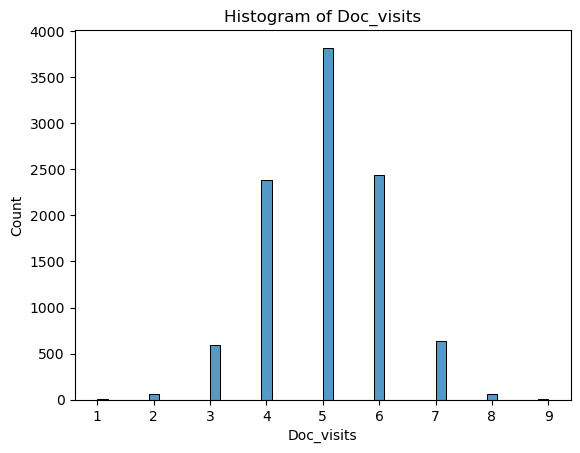

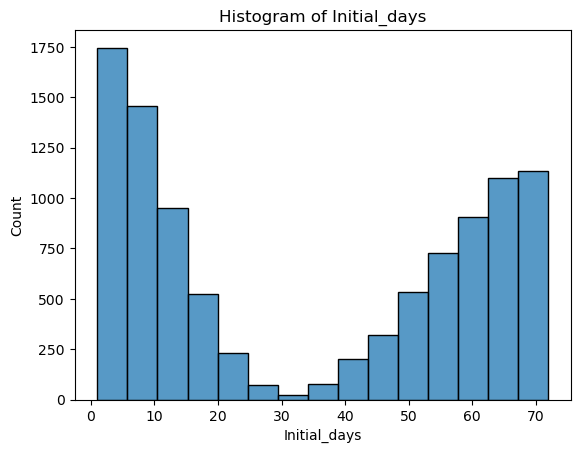

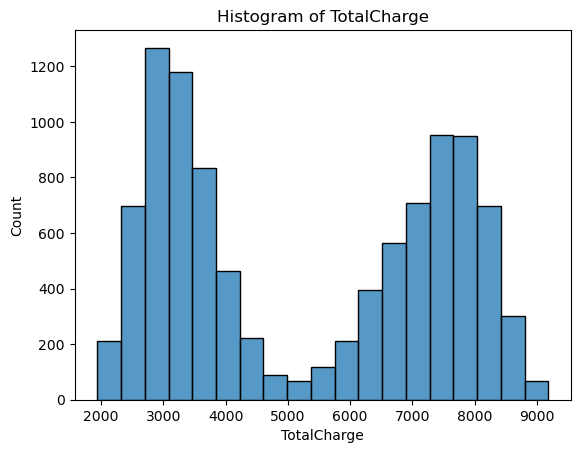

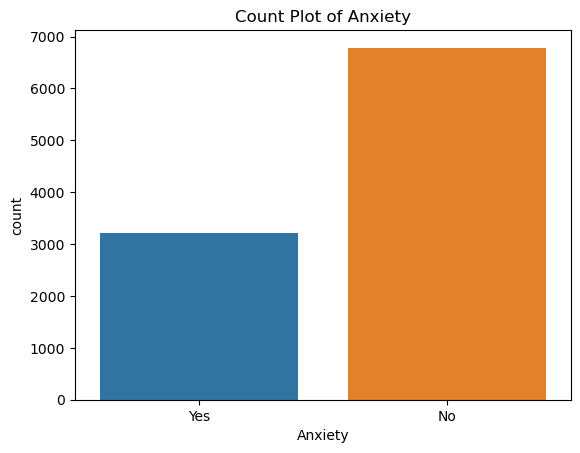

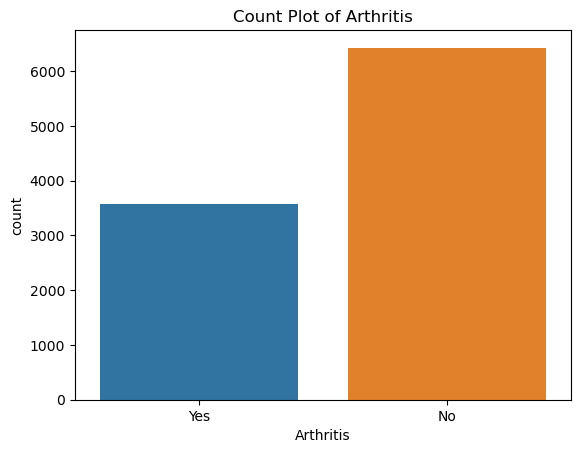

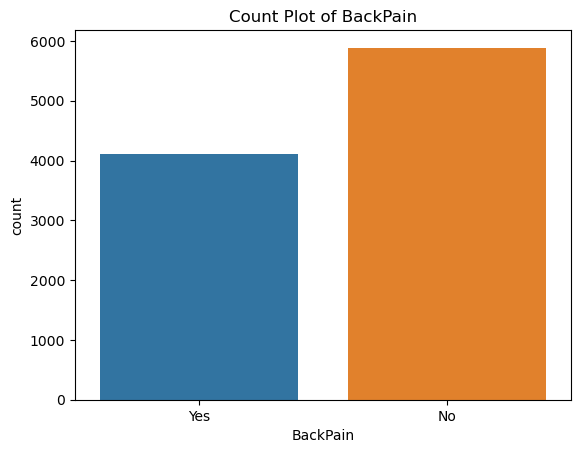

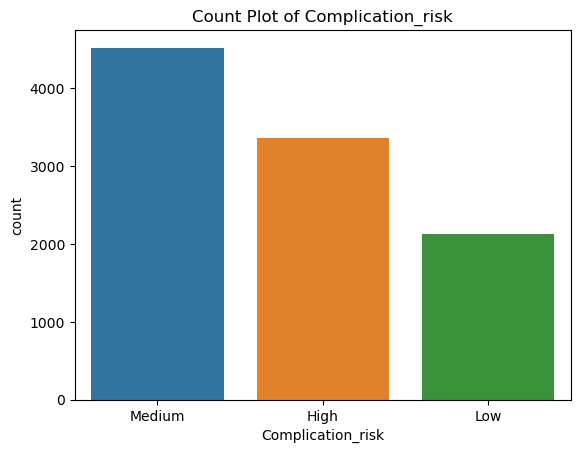

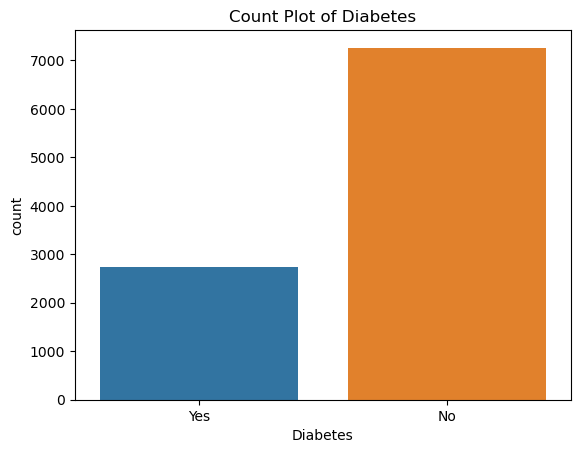

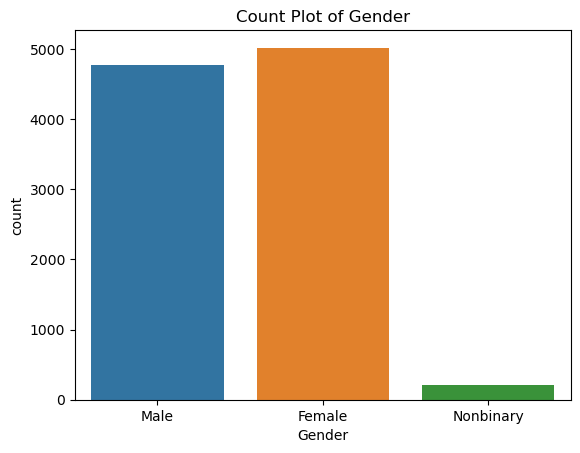

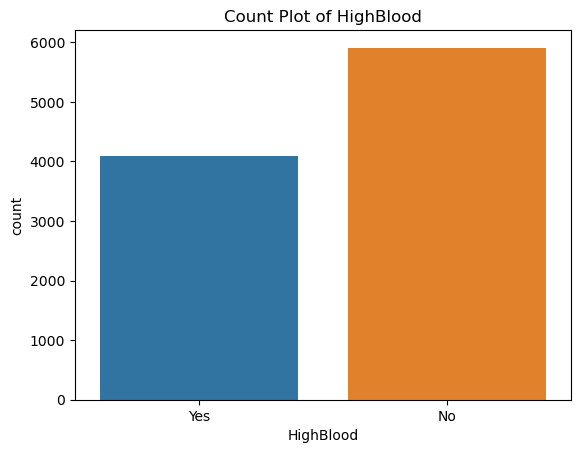

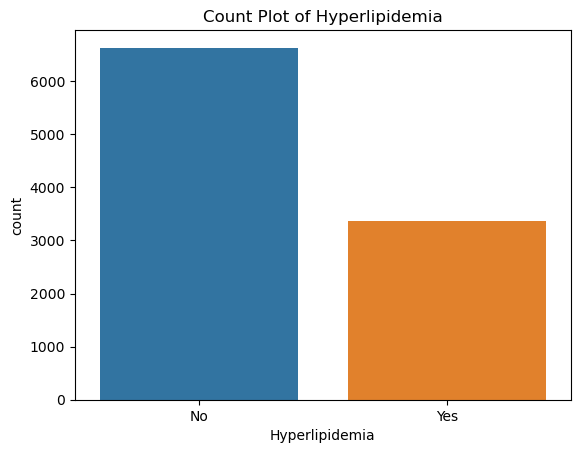

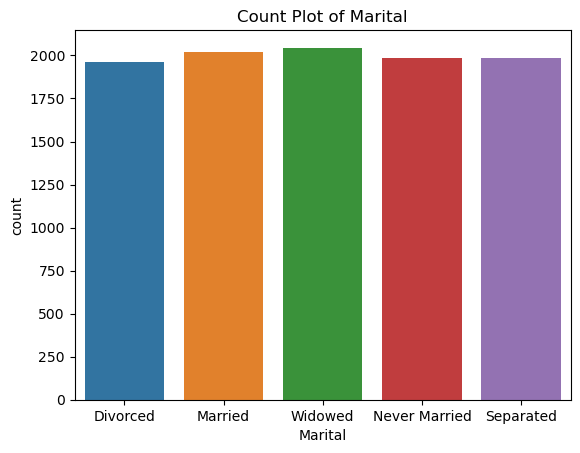

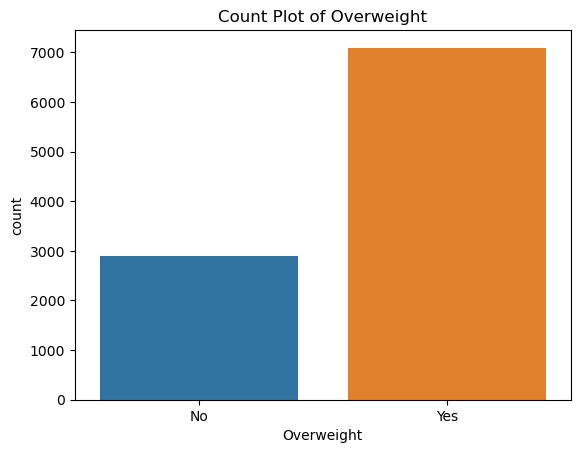

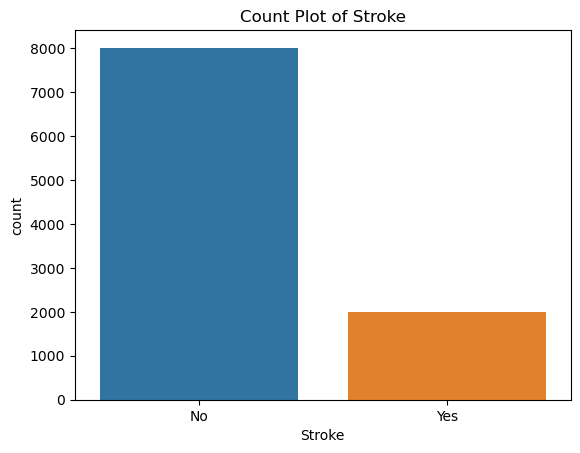

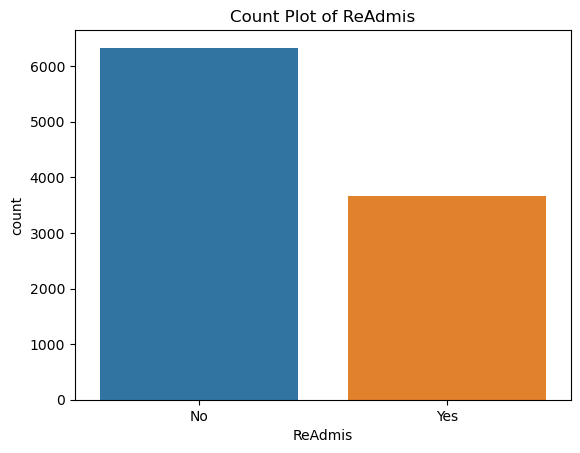

In [10]:
for col in num_var:
    plt.title(f'Histogram of {col}')
    sns.histplot(data=df, x=col)
    plt.show()

for col in cat_var:
    plt.title(f'Count Plot of {col}')
    sns.countplot(data=df, x=col)
    plt.show()

plt.title(f'Count Plot of ReAdmis')
sns.countplot(data=df, x='ReAdmis')
plt.show()

<b>Bivariate Visualizations</b>

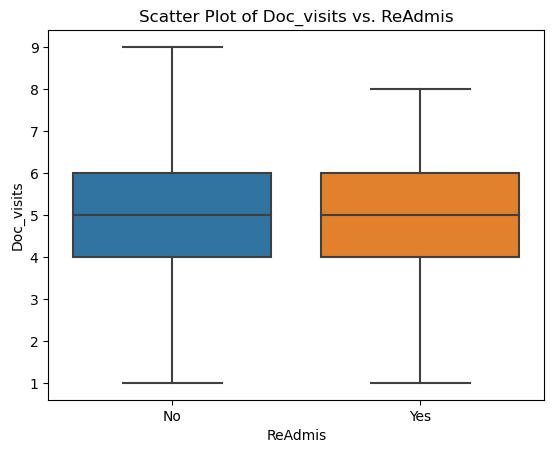

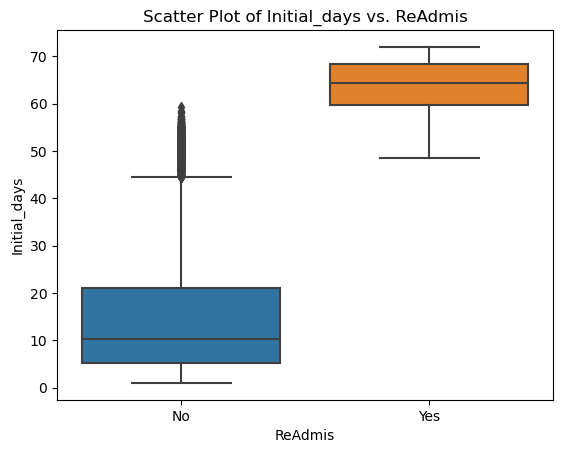

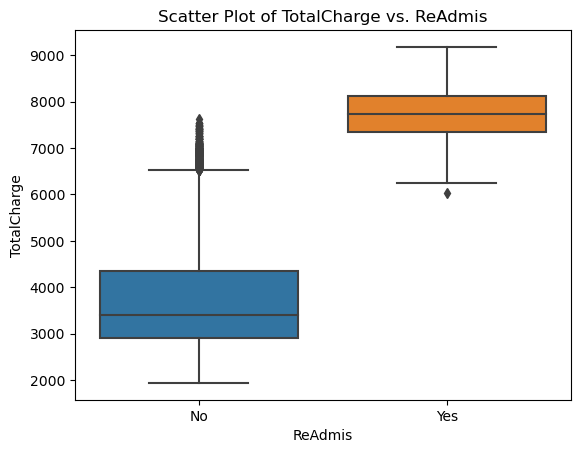

In [11]:
# Creating bivariate plots for numeric variables
for col in num_var:
    plt.title(f'Scatter Plot of {col} vs. ReAdmis')
    sns.boxplot(data=df, x='ReAdmis', y=col)
    plt.show()

In [12]:
# Extracting the column names and unique values
var = ['Anxiety', 'Arthritis', 'BackPain', 'Complication_risk', 'Diabetes', 'Gender', 'HighBlood', 'Hyperlipidemia', 'Marital', 'Overweight', 'Stroke', 'ReAdmis']

# Creating a dictionary with the var as keys and each unique response as items
dict = {}

# Getting unique values from each key in the dictionary (Striver, Unknown; Parasmadan15, Unknown)
for item in var:
    items = {item: df[item].drop_duplicates().tolist()}
    dict.update(items)

# Ordering the items in the dictionary (Apeksharustagi1998, Unknown)
dict = {key: sorted(value) for key, value in dict.items()}


In [58]:
dict

{'Anxiety': ['No', 'Yes'],
 'Arthritis': ['No', 'Yes'],
 'BackPain': ['No', 'Yes'],
 'Complication_risk': ['High', 'Low', 'Medium'],
 'Diabetes': ['No', 'Yes'],
 'Gender': ['Female', 'Male', 'Nonbinary'],
 'HighBlood': ['No', 'Yes'],
 'Hyperlipidemia': ['No', 'Yes'],
 'Marital': ['Divorced', 'Married', 'Never Married', 'Separated', 'Widowed'],
 'Overweight': ['No', 'Yes'],
 'Stroke': ['No', 'Yes'],
 'ReAdmis': ['No', 'Yes']}

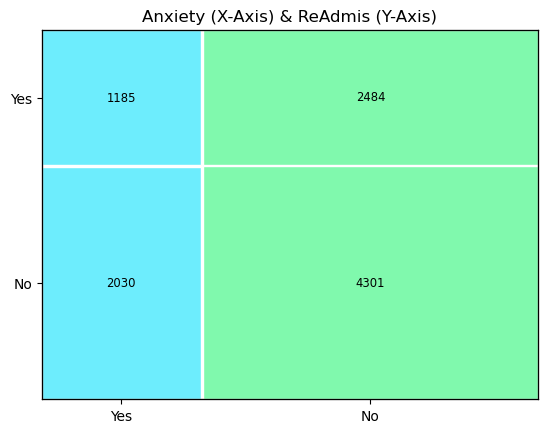

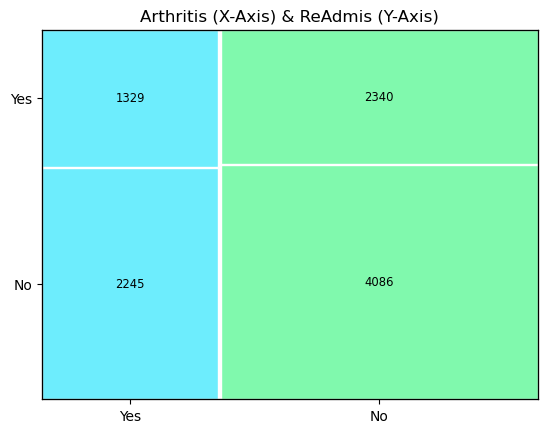

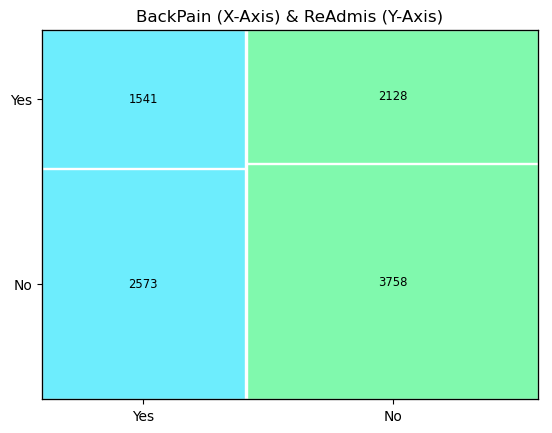

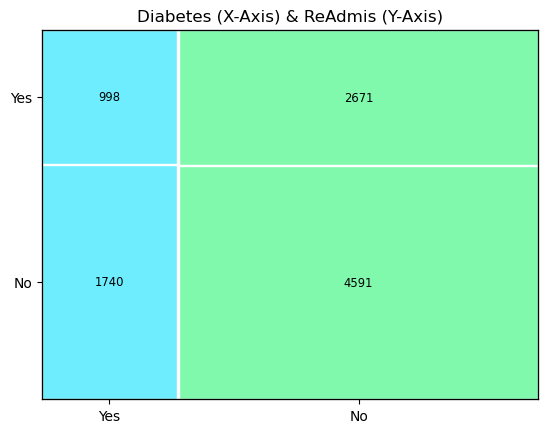

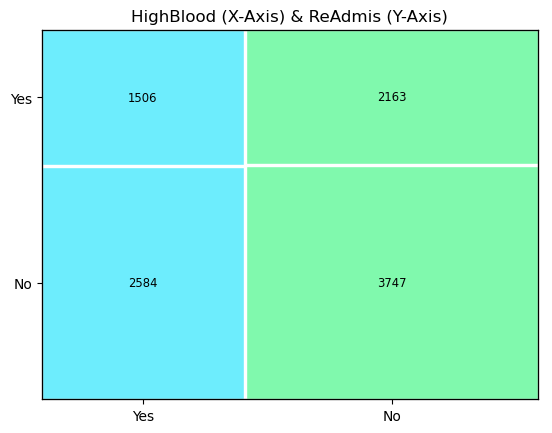

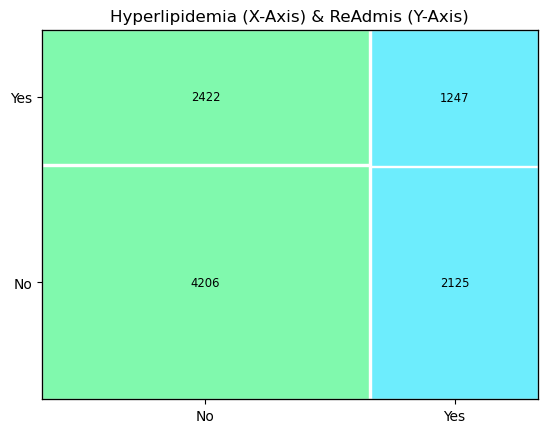

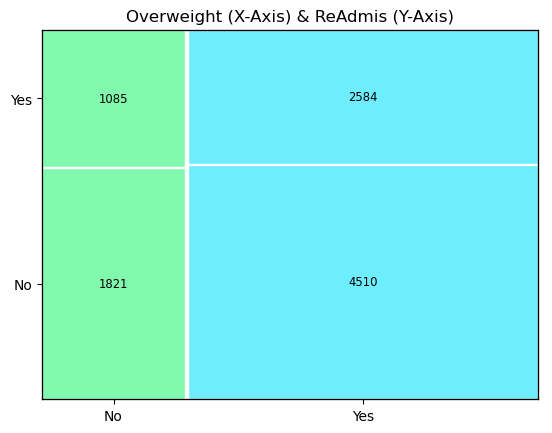

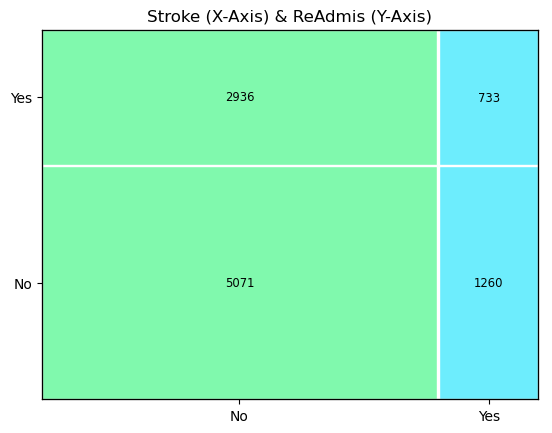

In [13]:
# Creating mosaic plot (Patil, 2020)
# Got color codes from https://xkcd.com/color/rgb/
from statsmodels.graphics.mosaicplot import mosaic

new_var = ['Anxiety', 'Arthritis', 'BackPain', 'Diabetes', 'HighBlood', 'Hyperlipidemia', 'Overweight', 'Stroke']

admission = ['No', 'Yes']

props = {}

for keys in new_var:
    props[dict[keys][0], admission[0]] = {'facecolor': 'xkcd:seafoam', 'edgecolor': 'white'}
    props[dict[keys][0], admission[1]] = {'facecolor': 'xkcd:seafoam', 'edgecolor': 'white'}
        
    props[dict[keys][1], admission[0]] = {'facecolor': "xkcd:robin's egg", 'edgecolor': 'white'}
    props[dict[keys][1], admission[1]] = {'facecolor': "xkcd:robin's egg", 'edgecolor': 'white'}
    
    labelizer = lambda k: {(dict[keys][0], admission[0]): df[keys][(df[keys] == 'No') & (df['ReAdmis'] == 'No')].count(), 
                           (dict[keys][0], admission[1]): df[keys][(df[keys] == 'No') & (df['ReAdmis'] == 'Yes')].count(), 
                           (dict[keys][1], admission[0]): df[keys][(df[keys] == 'Yes') & (df['ReAdmis'] == 'No')].count(), 
                           (dict[keys][1], admission[1]): df[keys][(df[keys] == 'Yes') & (df['ReAdmis'] == 'Yes')].count()}[k]

    mosaic(df, [keys, 'ReAdmis'], labelizer = labelizer, properties=props, title=f'{keys} (X-Axis) & ReAdmis (Y-Axis)');

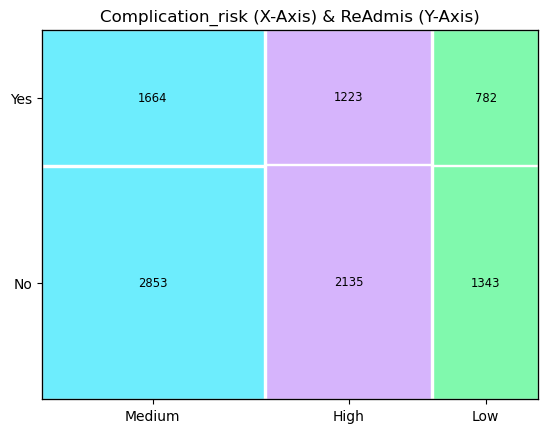

In [14]:
# Creating bivariate visualization for 'Complication_risk'
admission = ['No', 'Yes']

props = {}

props[(dict['Complication_risk'][1], admission[0])] = {'facecolor': 'xkcd:seafoam', 'edgecolor': 'white'}
props[(dict['Complication_risk'][1], admission[1])] = {'facecolor': 'xkcd:seafoam', 'edgecolor': 'white'}

props[(dict['Complication_risk'][2], admission[0])] = {'facecolor': "xkcd:robin's egg", 'edgecolor': 'white'}
props[(dict['Complication_risk'][2], admission[1])] = {'facecolor': "xkcd:robin's egg", 'edgecolor': 'white'}

props[(dict['Complication_risk'][0], admission[0])] = {'facecolor': 'xkcd:light violet', 'edgecolor': 'white'}
props[(dict['Complication_risk'][0], admission[1])] = {'facecolor': 'xkcd:light violet', 'edgecolor': 'white'}

labelizer = lambda k: {
                           (dict['Complication_risk'][1], admission[0]): df['Complication_risk'][(df['Complication_risk'] == 'Low') & (df['ReAdmis'] == 'No')].count(), 
                           (dict['Complication_risk'][1], admission[1]): df['Complication_risk'][(df['Complication_risk'] == 'Low') & (df['ReAdmis'] == 'Yes')].count(), 
                           (dict['Complication_risk'][2], admission[0]): df['Complication_risk'][(df['Complication_risk'] == 'Medium') & (df['ReAdmis'] == 'No')].count(), 
                           (dict['Complication_risk'][2], admission[1]): df['Complication_risk'][(df['Complication_risk'] == 'Medium') & (df['ReAdmis'] == 'Yes')].count(),
                           (dict['Complication_risk'][0], admission[0]): df['Complication_risk'][(df['Complication_risk'] == 'High') & (df['ReAdmis'] == 'No')].count(),
                           (dict['Complication_risk'][0], admission[1]): df['Complication_risk'][(df['Complication_risk'] == 'High') & (df['ReAdmis'] == 'Yes')].count()}[k]

mosaic(df, ['Complication_risk', 'ReAdmis'], labelizer = labelizer, properties=props, title='Complication_risk (X-Axis) & ReAdmis (Y-Axis)');

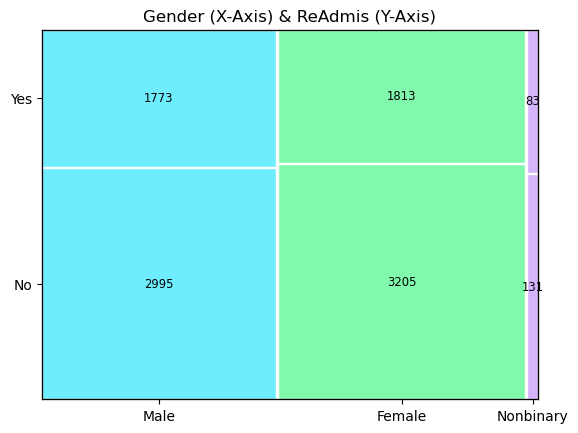

In [15]:
# Creating bivariate visualization for 'Gender'
admission = ['No', 'Yes']

props = {}

props[(dict['Gender'][0], admission[0])] = {'facecolor': 'xkcd:seafoam', 'edgecolor': 'white'}
props[(dict['Gender'][0], admission[1])] = {'facecolor': 'xkcd:seafoam', 'edgecolor': 'white'}

props[(dict['Gender'][1], admission[0])] = {'facecolor': "xkcd:robin's egg", 'edgecolor': 'white'}
props[(dict['Gender'][1], admission[1])] = {'facecolor': "xkcd:robin's egg", 'edgecolor': 'white'}

props[(dict['Gender'][2], admission[0])] = {'facecolor': 'xkcd:light violet', 'edgecolor': 'white'}
props[(dict['Gender'][2], admission[1])] = {'facecolor': 'xkcd:light violet', 'edgecolor': 'white'}

labelizer = lambda k: {
                           (dict['Gender'][0], admission[0]): df['Gender'][(df['Gender'] == 'Female') & (df['ReAdmis'] == 'No')].count(), 
                           (dict['Gender'][0], admission[1]): df['Gender'][(df['Gender'] == 'Female') & (df['ReAdmis'] == 'Yes')].count(), 
                           (dict['Gender'][1], admission[0]): df['Gender'][(df['Gender'] == 'Male') & (df['ReAdmis'] == 'No')].count(), 
                           (dict['Gender'][1], admission[1]): df['Gender'][(df['Gender'] == 'Male') & (df['ReAdmis'] == 'Yes')].count(),
                           (dict['Gender'][2], admission[0]): df['Gender'][(df['Gender'] == 'Nonbinary') & (df['ReAdmis'] == 'No')].count(),
                           (dict['Gender'][2], admission[1]): df['Gender'][(df['Gender'] == 'Nonbinary') & (df['ReAdmis'] == 'Yes')].count()}[k]

mosaic(df, ['Gender', 'ReAdmis'], labelizer = labelizer, properties=props, title='Gender (X-Axis) & ReAdmis (Y-Axis)');

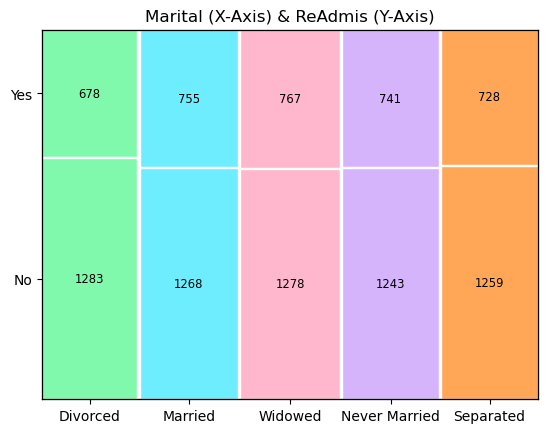

In [16]:
# Creating bivariate visualization for 'Marital'
admission = ['No', 'Yes']

props = {}

props[(dict['Marital'][0], admission[0])] = {'facecolor': 'xkcd:seafoam', 'edgecolor': 'white'}
props[(dict['Marital'][0], admission[1])] = {'facecolor': 'xkcd:seafoam', 'edgecolor': 'white'}

props[(dict['Marital'][1], admission[0])] = {'facecolor': "xkcd:robin's egg", 'edgecolor': 'white'}
props[(dict['Marital'][1], admission[1])] = {'facecolor': "xkcd:robin's egg", 'edgecolor': 'white'}

props[(dict['Marital'][2], admission[0])] = {'facecolor': 'xkcd:light violet', 'edgecolor': 'white'}
props[(dict['Marital'][2], admission[1])] = {'facecolor': 'xkcd:light violet', 'edgecolor': 'white'}

props[(dict['Marital'][3], admission[0])] = {'facecolor': 'xkcd:pale orange', 'edgecolor': 'white'}
props[(dict['Marital'][3], admission[1])] = {'facecolor': 'xkcd:pale orange', 'edgecolor': 'white'}

props[(dict['Marital'][4], admission[0])] = {'facecolor': 'xkcd:baby pink', 'edgecolor': 'white'}
props[(dict['Marital'][4], admission[1])] = {'facecolor': 'xkcd:baby pink', 'edgecolor': 'white'}

labelizer = lambda k: {
                           (dict['Marital'][0], admission[0]): df['Marital'][(df['Marital'] == 'Divorced') & (df['ReAdmis'] == 'No')].count(), 
                           (dict['Marital'][0], admission[1]): df['Marital'][(df['Marital'] == 'Divorced') & (df['ReAdmis'] == 'Yes')].count(),
                           (dict['Marital'][1], admission[0]): df['Marital'][(df['Marital'] == 'Married') & (df['ReAdmis'] == 'No')].count(), 
                           (dict['Marital'][1], admission[1]): df['Marital'][(df['Marital'] == 'Married') & (df['ReAdmis'] == 'Yes')].count(),
                           (dict['Marital'][2], admission[0]): df['Marital'][(df['Marital'] == 'Never Married') & (df['ReAdmis'] == 'No')].count(), 
                           (dict['Marital'][2], admission[1]): df['Marital'][(df['Marital'] == 'Never Married') & (df['ReAdmis'] == 'Yes')].count(),
                           (dict['Marital'][3], admission[0]): df['Marital'][(df['Marital'] == 'Separated') & (df['ReAdmis'] == 'No')].count(), 
                           (dict['Marital'][3], admission[1]): df['Marital'][(df['Marital'] == 'Separated') & (df['ReAdmis'] == 'Yes')].count(),
                           (dict['Marital'][4], admission[0]): df['Marital'][(df['Marital'] == 'Widowed') & (df['ReAdmis'] == 'No')].count(),
                           (dict['Marital'][4], admission[1]): df['Marital'][(df['Marital'] == 'Widowed') & (df['ReAdmis'] == 'Yes')].count()}[k]

mosaic(df, ['Marital', 'ReAdmis'], labelizer = labelizer, properties=props, title='Marital (X-Axis) & ReAdmis (Y-Axis)');

#### C4. Data Transformation

I used several independent categorical variables that I have re-expressed to convert their values to numeric.  By re-expressing the categorical variables and converting their values to numeric, I'm now able to include these variables in my regression analysis.

The re-expressed categorical variables are:

<ul>
    <li>Anxiety</li>
    <li>Arthritis</li>
    <li>BackPain</li>
    <li>Complication_risk</li>
    <li>Diabetes</li>
    <li>Gender</li>
    <li>HighBlood</li>
    <li>Hyperlipidemia</li>
    <li>Marital</li>
    <li>Overweight</li>
    <li>Stroke</li>
</ul>

For ordinal categorical variables, I changed Yes/No to 1/0.  I used a loop to encode most of the categorical variables which are variables in the cat_var list.  I separately encoded 'Complication_risk' due to it having three items instead of two, which all variables in cat_var had.

I used one-hot encoding for 'Gender' and 'Marital' because they are nominal categorical variables.  To one hot encode I used dummies which create a column for each selection except for the first selection (k-1).  The reason that one hot encoding requires the use of k-1 is to avoid multicollinearity.

I created a new variable, selected_var, to include all of my selected independent variables.  I passed these variables through the data frame, and saved as prepared.  I exported the prepared data to a CSV.

In [17]:
# Re-expressing categorical variables
# Creating new cat_var list to limit to variables values of No or Yes
remove_list = ['Complication_risk', 'Gender', 'Marital']

for item in remove_list:
    cat_var.remove(item)

In [18]:
# Validating list has been updated; list does not include the items in remove_list
cat_var

['Anxiety',
 'Arthritis',
 'BackPain',
 'Diabetes',
 'HighBlood',
 'Hyperlipidemia',
 'Overweight',
 'Stroke']

In [19]:
# Re-expressing categorical variables in cat_var
for item in cat_var:
    df[item] = df[item].map({'No': 0, 'Yes': 1})

In [20]:
# Checking that encoding worked properly
for item in cat_var:
    print(f'{item} Counts')
    a = df[item].value_counts()
    print(a)
    print('-'*100)

Anxiety Counts
0    6785
1    3215
Name: Anxiety, dtype: int64
----------------------------------------------------------------------------------------------------
Arthritis Counts
0    6426
1    3574
Name: Arthritis, dtype: int64
----------------------------------------------------------------------------------------------------
BackPain Counts
0    5886
1    4114
Name: BackPain, dtype: int64
----------------------------------------------------------------------------------------------------
Diabetes Counts
0    7262
1    2738
Name: Diabetes, dtype: int64
----------------------------------------------------------------------------------------------------
HighBlood Counts
0    5910
1    4090
Name: HighBlood, dtype: int64
----------------------------------------------------------------------------------------------------
Hyperlipidemia Counts
0    6628
1    3372
Name: Hyperlipidemia, dtype: int64
-------------------------------------------------------------------------------------------

In [21]:
# Re-expressing target variable, setting 'No' to 1 since the hospital's ideal result is that the patient is not readmitted
df['ReAdmis'] = df['ReAdmis'].map({'No': 1, 'Yes': 0})

In [22]:
# Re-expressing 'Complication_risk'
df['Complication_risk'] = df['Complication_risk'].map({'Low': 0, 'Medium': 1, 'High': 2})

print('Complication_risk Counts')
print(df['Complication_risk'].value_counts())

Complication_risk Counts
1    4517
2    3358
0    2125
Name: Complication_risk, dtype: int64


In [23]:
# Re-expressing 'Gender' using one-hot encoding
ohe1 = pd.get_dummies(df['Gender'], drop_first=True)

# Adding new columns to main df
for item in ohe1.columns:
    df[item] = ohe1[item]

# Deleting the 'Gender' column since I have used one-hot encoding
del df['Gender']

In [24]:
# Checking value counts for one-hot encoded 'Gender'
for item in ohe1.columns:
    print(f'{item} Counts')
    print(df[item].value_counts())
    print('-'*100)

Male Counts
0    5232
1    4768
Name: Male, dtype: int64
----------------------------------------------------------------------------------------------------
Nonbinary Counts
0    9786
1     214
Name: Nonbinary, dtype: int64
----------------------------------------------------------------------------------------------------


In [25]:
# Re-expressing 'Marital' using one-hot encoding
ohe2 = pd.get_dummies(df['Marital'], drop_first=True)

# Adding new columns to main df
for item in ohe2.columns:
    df[item] = ohe2[item]

# Deleting the 'Gender' column since I have used one-hot encoding
del df['Marital']

In [26]:
# Checking value counts for one-hot encoded 'Gender'
for item in ohe2.columns:
    print(f'{item} Counts')
    print(df[item].value_counts())
    print('-'*100)

Married Counts
0    7977
1    2023
Name: Married, dtype: int64
----------------------------------------------------------------------------------------------------
Never Married Counts
0    8016
1    1984
Name: Never Married, dtype: int64
----------------------------------------------------------------------------------------------------
Separated Counts
0    8013
1    1987
Name: Separated, dtype: int64
----------------------------------------------------------------------------------------------------
Widowed Counts
0    7955
1    2045
Name: Widowed, dtype: int64
----------------------------------------------------------------------------------------------------


#### C5. Prepared Data Set

In [27]:
# Updating categorical variable list to include all selected independent variables
selected_var = ['Complication_risk']

for item in num_var:
    selected_var.append(item)
for item in cat_var:
    selected_var.append(item)
for item in ohe1:
    selected_var.append(item)
for item in ohe2:
    selected_var.append(item)

selected_var.append('ReAdmis')

In [28]:
# Creating new df with all of the selected independent variables
prepared = df[selected_var]

In [29]:
# Extracting prepared data set to CSV file
prepared.to_csv(r'C:/Users/Favio/Documents/Education/WGU/MSDA/D208/PA/Files/medical_prepared_T2.csv')

### PART IV: MODEL COMPARISON AND ANALYSIS

#### D1. Initial Model

In [30]:
# Defining x as all of the selected independent variables
# Defining y as the dependent variable
# Code is from Dr. Sewell's Episode 4 PowerPoint, Slide 23

x = prepared.iloc[:, 0:18]
y = prepared.iloc[:, -1]

Logit_model = sm.Logit(y, sm.add_constant(x)).fit()
Logit_model.summary()

Optimization terminated successfully.
         Current function value: 0.039742
         Iterations 13


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                ReAdmis   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9981
Method:                           MLE   Df Model:                           18
Date:                Thu, 24 Aug 2023   Pseudo R-squ.:                  0.9395
Time:                        20:34:38   Log-Likelihood:                -397.42
converged:                       True   LL-Null:                       -6572.9
Covariance Type:            nonrobust   LLR p-value:                     0.000
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                72.8197      3.765     19.340      0.000      65.440      80.199
Complication_risk    -0.1354      0.146     -0.925      0.355      -0.422       0.152
Doc_visits            0.0013      0.085      0.015      0.988      -0.165       0.168
Initial_days         -1.0262      0.059    -17.288      0.000      -1.143      -0.910
TotalCharge          -0.0024      0.000     -7.068      0.000      -0.003      -0.002
Anxiety               1.0054      0.202      4.966      0.000       0.609       1.402
Arthritis             1.2466      0.206      6.052      0.000       0.843       1.650
BackPain             -0.1256      0.189     -0.664      0.507      -0.496       0.245
Diabetes             -0.2608      0.207     -1.257      0.209      -0.667       0.146
HighBlood            -0.5290      0.196     -2.696      0.007      -0.914      -0.144
Hyperlipidemia       -0.0876      0.198     -0.443      0.658      -0.475       0.300
Overweight            0.2019      0.205      0.986      0.324      -0.199       0.603
Stroke               -1.5101      0.242     -6.252      0.000      -1.984      -1.037
Male                 -0.0726      0.187     -0.388      0.698      -0.439       0.294
Nonbinary            -0.6686      0.664     -1.008      0.314      -1.969       0.632
Married              -0.2245      0.289     -0.776      0.438      -0.792       0.342
Never Married        -0.2538      0.300     -0.847      0.397      -0.841       0.333
Separated            -0.0396      0.300     -0.132      0.895      -0.628       0.549
Widowed              -0.5221      0.294     -1.777      0.076      -1.098       0.054
=====================================================================================

Possibly complete quasi-separation: A fraction 0.78 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

In [31]:
# Checking model's accuracy
# Code is from Dr. Sewell's Episode 5 PowerPoint, slide 39

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

model = LogisticRegression(solver='liblinear', random_state=0)
model.fit(x, y)
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                  intercept_scaling=1, l1_ratio=None, max_iter=100,
                  multi_class='warn', n_jobs=None, penalty='l2',
                  random_state=0, solver='liblinear', tol=0.0001, verbose=0,
                  warm_start=False)
model.classes_
model.intercept_
model.coef_
model.predict_proba(x)
model.predict(x)
model.score(x, y)

0.9651

#### D2. Justification of Model Reduction

Talk about initial results.

Prior to any model reduction, my inital model had a model accuracy of 96.5%.  For the first round of model reduction, I used variable inflaction factor to check for multicollinearity.  From this analysis, 'TotalCharge', 'Initial_days', and 'Doc_visits'all had VIF values higher than 10,  so I decided to first drop the highest one, with was 'TotalCharge' with a VIF value of 177.  I re-ran the VIF analysis and this time, no VIF values were greater than 10, so I stopped reducing my model based on VIF.

Next, I analyzed the data using the Logit Regression Results method.  I iterated the logit method and removed the independent variable with the highest p-value each time.  Here is an ordered lists of the variables, along with its p-value, I removed on each iteration:

<ul>
    <li>Male: p-value 0.928</li>
    <li>Separated: p-value 0.888</li>
    <li>Doc_visits: p-value 0.750</li>
    <li>Nonbinary: p-value 0.688</li>
    <li>Overweight: p-value 0.395</li>
    <li>Married: p-value 0.270</li>
    <li>Never Married: p-value 0.434</li>
    <li>Hyperlipidemia: p-value 0.084</li>
    <li>Widowed: p-value 0.0733</li>
</ul>

After removing the nine independent variables above, I had my reduced model.  Based on the logistic regression score,  the reduced model's accuracy score increased from the initial model's 96.5% to 97.8%.  The 97.8% is confirmed in both of the logistic and linear regression calculations.

In [32]:
# Using VIF to test for multicollinearity; code is from Dr. Sewell's Episode 1 PowerPoint on slide 27.

from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data = pd.DataFrame()
vif_data['Feature'] = x.columns
vif_data['VIF'] = [variance_inflation_factor(x.values, i) for i in range(len(x.columns))]

vif_data.sort_values('VIF', axis=0, ascending=False, inplace=True)

print(vif_data)

              Feature         VIF
3         TotalCharge  177.146078
2        Initial_days   74.668517
1          Doc_visits   18.142183
0   Complication_risk    4.263136
10         Overweight    3.352269
17            Widowed    1.992132
14            Married    1.990271
16          Separated    1.959935
15      Never Married    1.957937
12               Male    1.926669
8           HighBlood    1.750293
6            BackPain    1.744317
5           Arthritis    1.582720
9      Hyperlipidemia    1.554289
4             Anxiety    1.506168
7            Diabetes    1.395355
11             Stroke    1.245093
13          Nonbinary    1.043855


In [33]:
# Removing 'TotalCharge' and re-running VIF

x.pop('TotalCharge')

vif_data = pd.DataFrame()
vif_data['Feature'] = x.columns
vif_data['VIF'] = [variance_inflation_factor(x.values, i) for i in range(len(x.columns))]

vif_data.sort_values('VIF', axis=0, ascending=False, inplace=True)

print(vif_data)

              Feature       VIF
1          Doc_visits  9.810761
9          Overweight  3.253298
0   Complication_risk  3.178516
2        Initial_days  2.603290
13            Married  1.910027
16            Widowed  1.908586
11               Male  1.902538
14      Never Married  1.883308
15          Separated  1.881018
5            BackPain  1.677180
7           HighBlood  1.673272
4           Arthritis  1.542225
8      Hyperlipidemia  1.484812
3             Anxiety  1.456746
6            Diabetes  1.366330
10             Stroke  1.240195
12          Nonbinary  1.042993


In [34]:
# Code is from Dr. Sewell's Episode 4 Powerpoint, slide 23
Logit_model = sm.Logit(y, sm.add_constant(x)).fit()
Logit_model.summary()

Optimization terminated successfully.
         Current function value: 0.042489
         Iterations 13


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                ReAdmis   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9982
Method:                           MLE   Df Model:                           17
Date:                Thu, 24 Aug 2023   Pseudo R-squ.:                  0.9354
Time:                        20:34:39   Log-Likelihood:                -424.89
converged:                       True   LL-Null:                       -6572.9
Covariance Type:            nonrobust   LLR p-value:                     0.000
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                64.1522      3.216     19.945      0.000      57.848      70.456
Complication_risk    -0.6543      0.126     -5.197      0.000      -0.901      -0.408
Doc_visits           -0.0262      0.082     -0.318      0.751      -0.188       0.135
Initial_days         -1.1564      0.057    -20.196      0.000      -1.269      -1.044
Anxiety               0.7612      0.191      3.979      0.000       0.386       1.136
Arthritis             0.9468      0.194      4.871      0.000       0.566       1.328
BackPain             -0.3303      0.181     -1.821      0.069      -0.686       0.025
Diabetes             -0.4469      0.199     -2.251      0.024      -0.836      -0.058
HighBlood            -0.7287      0.188     -3.875      0.000      -1.097      -0.360
Hyperlipidemia       -0.3310      0.190     -1.742      0.082      -0.703       0.041
Overweight            0.1664      0.196      0.848      0.397      -0.218       0.551
Stroke               -1.4123      0.232     -6.099      0.000      -1.866      -0.958
Male                 -0.0161      0.180     -0.090      0.928      -0.368       0.336
Nonbinary            -0.2492      0.639     -0.390      0.697      -1.501       1.003
Married              -0.2523      0.279     -0.904      0.366      -0.799       0.295
Never Married        -0.2646      0.288     -0.918      0.359      -0.830       0.301
Separated             0.0412      0.290      0.142      0.887      -0.527       0.609
Widowed              -0.5087      0.284     -1.791      0.073      -1.065       0.048
=====================================================================================

Possibly complete quasi-separation: A fraction 0.77 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

In [35]:
# Dropping 'Male' as an independent variable
x.drop('Male', axis=1, inplace=True)

In [36]:
# Checking p-values after dropping 'Male'
Logit_model = sm.Logit(y, sm.add_constant(x)).fit()
Logit_model.summary()

Optimization terminated successfully.
         Current function value: 0.042490
         Iterations 13


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                ReAdmis   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9983
Method:                           MLE   Df Model:                           16
Date:                Thu, 24 Aug 2023   Pseudo R-squ.:                  0.9354
Time:                        20:34:39   Log-Likelihood:                -424.90
converged:                       True   LL-Null:                       -6572.9
Covariance Type:            nonrobust   LLR p-value:                     0.000
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                64.1542      3.217     19.945      0.000      57.850      70.459
Complication_risk    -0.6552      0.126     -5.218      0.000      -0.901      -0.409
Doc_visits           -0.0261      0.082     -0.317      0.752      -0.188       0.136
Initial_days         -1.1565      0.057    -20.207      0.000      -1.269      -1.044
Anxiety               0.7620      0.191      3.986      0.000       0.387       1.137
Arthritis             0.9462      0.194      4.871      0.000       0.565       1.327
BackPain             -0.3300      0.181     -1.820      0.069      -0.685       0.025
Diabetes             -0.4469      0.199     -2.251      0.024      -0.836      -0.058
HighBlood            -0.7280      0.188     -3.875      0.000      -1.096      -0.360
Hyperlipidemia       -0.3311      0.190     -1.742      0.081      -0.704       0.041
Overweight            0.1667      0.196      0.850      0.395      -0.218       0.551
Stroke               -1.4140      0.231     -6.127      0.000      -1.866      -0.962
Nonbinary            -0.2420      0.634     -0.382      0.703      -1.484       1.000
Married              -0.2532      0.279     -0.908      0.364      -0.800       0.293
Never Married        -0.2642      0.288     -0.916      0.360      -0.829       0.301
Separated             0.0407      0.290      0.140      0.888      -0.527       0.609
Widowed              -0.5095      0.284     -1.795      0.073      -1.066       0.047
=====================================================================================

Possibly complete quasi-separation: A fraction 0.77 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

In [37]:
# Dropping 'Separated' as an independent variable
x.drop('Separated', axis=1, inplace=True)

In [38]:
# Checking p-values after dropping 'Separated'
Logit_model = sm.Logit(y, sm.add_constant(x)).fit()
Logit_model.summary()

Optimization terminated successfully.
         Current function value: 0.042491
         Iterations 13


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                ReAdmis   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9984
Method:                           MLE   Df Model:                           15
Date:                Thu, 24 Aug 2023   Pseudo R-squ.:                  0.9354
Time:                        20:34:39   Log-Likelihood:                -424.91
converged:                       True   LL-Null:                       -6572.9
Covariance Type:            nonrobust   LLR p-value:                     0.000
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                64.1761      3.213     19.973      0.000      57.878      70.474
Complication_risk    -0.6544      0.125     -5.217      0.000      -0.900      -0.409
Doc_visits           -0.0263      0.082     -0.319      0.750      -0.188       0.135
Initial_days         -1.1566      0.057    -20.209      0.000      -1.269      -1.044
Anxiety               0.7609      0.191      3.984      0.000       0.387       1.135
Arthritis             0.9468      0.194      4.875      0.000       0.566       1.328
BackPain             -0.3298      0.181     -1.818      0.069      -0.685       0.026
Diabetes             -0.4458      0.198     -2.247      0.025      -0.835      -0.057
HighBlood            -0.7291      0.188     -3.884      0.000      -1.097      -0.361
Hyperlipidemia       -0.3315      0.190     -1.745      0.081      -0.704       0.041
Overweight            0.1686      0.196      0.862      0.389      -0.215       0.552
Stroke               -1.4127      0.231     -6.128      0.000      -1.865      -0.961
Nonbinary            -0.2488      0.632     -0.394      0.694      -1.487       0.989
Married              -0.2740      0.237     -1.158      0.247      -0.738       0.190
Never Married        -0.2850      0.248     -1.150      0.250      -0.771       0.201
Widowed              -0.5301      0.243     -2.183      0.029      -1.006      -0.054
=====================================================================================

Possibly complete quasi-separation: A fraction 0.77 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

In [39]:
# Dropping 'Doc_visits' as an independent variable
x.drop('Doc_visits', axis=1, inplace=True)

In [40]:
# Checking p-values after dropping 'Doc_visits'
Logit_model = sm.Logit(y, sm.add_constant(x)).fit()
Logit_model.summary()

Optimization terminated successfully.
         Current function value: 0.042496
         Iterations 13


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                ReAdmis   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9985
Method:                           MLE   Df Model:                           14
Date:                Thu, 24 Aug 2023   Pseudo R-squ.:                  0.9353
Time:                        20:34:39   Log-Likelihood:                -424.96
converged:                       True   LL-Null:                       -6572.9
Covariance Type:            nonrobust   LLR p-value:                     0.000
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                64.0456      3.182     20.124      0.000      57.808      70.283
Complication_risk    -0.6534      0.125     -5.215      0.000      -0.899      -0.408
Initial_days         -1.1565      0.057    -20.218      0.000      -1.269      -1.044
Anxiety               0.7624      0.191      3.992      0.000       0.388       1.137
Arthritis             0.9420      0.194      4.868      0.000       0.563       1.321
BackPain             -0.3315      0.181     -1.829      0.067      -0.687       0.024
Diabetes             -0.4496      0.198     -2.270      0.023      -0.838      -0.061
HighBlood            -0.7317      0.188     -3.901      0.000      -1.099      -0.364
Hyperlipidemia       -0.3283      0.190     -1.731      0.084      -0.700       0.044
Overweight            0.1684      0.196      0.861      0.389      -0.215       0.552
Stroke               -1.4096      0.230     -6.122      0.000      -1.861      -0.958
Nonbinary            -0.2538      0.631     -0.402      0.688      -1.491       0.983
Married              -0.2752      0.237     -1.163      0.245      -0.739       0.189
Never Married        -0.2857      0.248     -1.153      0.249      -0.771       0.200
Widowed              -0.5287      0.243     -2.178      0.029      -1.004      -0.053
=====================================================================================

Possibly complete quasi-separation: A fraction 0.77 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

In [41]:
# Dropping 'Nonbinary' as an independent variable
x.drop('Nonbinary', axis=1, inplace=True)

In [42]:
# Checking p-values after dropping 'Nonbinary'
Logit_model = sm.Logit(y, sm.add_constant(x)).fit()
Logit_model.summary()

Optimization terminated successfully.
         Current function value: 0.042504
         Iterations 13


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                ReAdmis   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9986
Method:                           MLE   Df Model:                           13
Date:                Thu, 24 Aug 2023   Pseudo R-squ.:                  0.9353
Time:                        20:34:39   Log-Likelihood:                -425.04
converged:                       True   LL-Null:                       -6572.9
Covariance Type:            nonrobust   LLR p-value:                     0.000
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                64.0594      3.183     20.124      0.000      57.821      70.298
Complication_risk    -0.6539      0.125     -5.219      0.000      -0.899      -0.408
Initial_days         -1.1568      0.057    -20.220      0.000      -1.269      -1.045
Anxiety               0.7610      0.191      3.987      0.000       0.387       1.135
Arthritis             0.9424      0.194      4.870      0.000       0.563       1.322
BackPain             -0.3381      0.181     -1.872      0.061      -0.692       0.016
Diabetes             -0.4506      0.198     -2.276      0.023      -0.839      -0.063
HighBlood            -0.7344      0.188     -3.917      0.000      -1.102      -0.367
Hyperlipidemia       -0.3250      0.189     -1.716      0.086      -0.696       0.046
Overweight            0.1663      0.196      0.850      0.395      -0.217       0.550
Stroke               -1.4052      0.230     -6.114      0.000      -1.856      -0.955
Married              -0.2727      0.236     -1.153      0.249      -0.736       0.191
Never Married        -0.2841      0.248     -1.147      0.251      -0.770       0.201
Widowed              -0.5283      0.243     -2.178      0.029      -1.004      -0.053
=====================================================================================

Possibly complete quasi-separation: A fraction 0.77 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

In [43]:
# Dropping 'Overweight' as an independent variable
x.drop('Overweight', axis=1, inplace=True)

In [44]:
# Checking p-values after dropping 'Overweight'
Logit_model = sm.Logit(y, sm.add_constant(x)).fit()
Logit_model.summary()

Optimization terminated successfully.
         Current function value: 0.042540
         Iterations 13


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                ReAdmis   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9987
Method:                           MLE   Df Model:                           12
Date:                Thu, 24 Aug 2023   Pseudo R-squ.:                  0.9353
Time:                        20:34:39   Log-Likelihood:                -425.40
converged:                       True   LL-Null:                       -6572.9
Covariance Type:            nonrobust   LLR p-value:                     0.000
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                64.0621      3.182     20.134      0.000      57.826      70.298
Complication_risk    -0.6501      0.125     -5.196      0.000      -0.895      -0.405
Initial_days         -1.1549      0.057    -20.228      0.000      -1.267      -1.043
Anxiety               0.7598      0.191      3.982      0.000       0.386       1.134
Arthritis             0.9509      0.193      4.921      0.000       0.572       1.330
BackPain             -0.3474      0.180     -1.929      0.054      -0.701       0.006
Diabetes             -0.4517      0.198     -2.284      0.022      -0.839      -0.064
HighBlood            -0.7258      0.187     -3.879      0.000      -1.093      -0.359
Hyperlipidemia       -0.3217      0.189     -1.700      0.089      -0.693       0.049
Stroke               -1.4037      0.230     -6.111      0.000      -1.854      -0.953
Married              -0.2598      0.236     -1.103      0.270      -0.722       0.202
Never Married        -0.2788      0.248     -1.126      0.260      -0.764       0.206
Widowed              -0.5266      0.243     -2.171      0.030      -1.002      -0.051
=====================================================================================

Possibly complete quasi-separation: A fraction 0.77 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

In [45]:
# Dropping 'Married' as an independent variable
x.drop('Married', axis=1, inplace=True)

In [46]:
# Checking p-values after dropping 'Married'
Logit_model = sm.Logit(y, sm.add_constant(x)).fit()
Logit_model.summary()

Optimization terminated successfully.
         Current function value: 0.042601
         Iterations 13


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                ReAdmis   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9988
Method:                           MLE   Df Model:                           11
Date:                Thu, 24 Aug 2023   Pseudo R-squ.:                  0.9352
Time:                        20:34:39   Log-Likelihood:                -426.01
converged:                       True   LL-Null:                       -6572.9
Covariance Type:            nonrobust   LLR p-value:                     0.000
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                63.9392      3.175     20.137      0.000      57.716      70.163
Complication_risk    -0.6500      0.125     -5.198      0.000      -0.895      -0.405
Initial_days         -1.1543      0.057    -20.231      0.000      -1.266      -1.042
Anxiety               0.7571      0.191      3.970      0.000       0.383       1.131
Arthritis             0.9473      0.193      4.909      0.000       0.569       1.325
BackPain             -0.3569      0.180     -1.985      0.047      -0.709      -0.004
Diabetes             -0.4389      0.197     -2.226      0.026      -0.825      -0.052
HighBlood            -0.7382      0.187     -3.953      0.000      -1.104      -0.372
Hyperlipidemia       -0.3221      0.189     -1.706      0.088      -0.692       0.048
Stroke               -1.4078      0.230     -6.129      0.000      -1.858      -0.958
Never Married        -0.1805      0.231     -0.782      0.434      -0.633       0.272
Widowed              -0.4296      0.226     -1.903      0.057      -0.872       0.013
=====================================================================================

Possibly complete quasi-separation: A fraction 0.77 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

In [47]:
# Dropping 'Never Married' as an independent variable
x.drop('Never Married', axis=1, inplace=True)

In [48]:
# Checking p-values after dropping 'Never Married'
Logit_model = sm.Logit(y, sm.add_constant(x)).fit()
Logit_model.summary()

Optimization terminated successfully.
         Current function value: 0.042632
         Iterations 13


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                ReAdmis   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9989
Method:                           MLE   Df Model:                           10
Date:                Thu, 24 Aug 2023   Pseudo R-squ.:                  0.9351
Time:                        20:34:39   Log-Likelihood:                -426.32
converged:                       True   LL-Null:                       -6572.9
Covariance Type:            nonrobust   LLR p-value:                     0.000
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                63.8682      3.172     20.136      0.000      57.651      70.085
Complication_risk    -0.6541      0.125     -5.241      0.000      -0.899      -0.409
Initial_days         -1.1537      0.057    -20.232      0.000      -1.265      -1.042
Anxiety               0.7572      0.190      3.976      0.000       0.384       1.131
Arthritis             0.9475      0.193      4.915      0.000       0.570       1.325
BackPain             -0.3654      0.179     -2.036      0.042      -0.717      -0.014
Diabetes             -0.4366      0.197     -2.217      0.027      -0.823      -0.051
HighBlood            -0.7350      0.187     -3.940      0.000      -1.101      -0.369
Hyperlipidemia       -0.3260      0.189     -1.727      0.084      -0.696       0.044
Stroke               -1.4028      0.230     -6.110      0.000      -1.853      -0.953
Widowed              -0.3854      0.218     -1.765      0.078      -0.813       0.043
=====================================================================================

Possibly complete quasi-separation: A fraction 0.77 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

In [49]:
# Dropping 'Hyperlipidemia' as an independent variable
x.drop('Hyperlipidemia', axis=1, inplace=True)

In [50]:
# Checking p-values after dropping 'Hyperlipidemia'
Logit_model = sm.Logit(y, sm.add_constant(x)).fit()
Logit_model.summary()

Optimization terminated successfully.
         Current function value: 0.042782
         Iterations 13


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                ReAdmis   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9990
Method:                           MLE   Df Model:                            9
Date:                Thu, 24 Aug 2023   Pseudo R-squ.:                  0.9349
Time:                        20:34:39   Log-Likelihood:                -427.82
converged:                       True   LL-Null:                       -6572.9
Covariance Type:            nonrobust   LLR p-value:                     0.000
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                63.5118      3.146     20.185      0.000      57.345      69.679
Complication_risk    -0.6667      0.124     -5.355      0.000      -0.911      -0.423
Initial_days         -1.1490      0.057    -20.278      0.000      -1.260      -1.038
Anxiety               0.7608      0.190      4.004      0.000       0.388       1.133
Arthritis             0.9423      0.192      4.896      0.000       0.565       1.319
BackPain             -0.3668      0.179     -2.048      0.041      -0.718      -0.016
Diabetes             -0.4239      0.196     -2.158      0.031      -0.809      -0.039
HighBlood            -0.7289      0.186     -3.915      0.000      -1.094      -0.364
Stroke               -1.3784      0.228     -6.041      0.000      -1.826      -0.931
Widowed              -0.3900      0.217     -1.793      0.073      -0.816       0.036
=====================================================================================

Possibly complete quasi-separation: A fraction 0.77 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

In [51]:
# Dropping 'Widowed' as an independent variable
x.drop('Widowed', axis=1, inplace=True)

In [52]:
# Checking p-values after dropping 'Widowed'
Logit_model = sm.Logit(y, sm.add_constant(x)).fit()
Logit_model.summary()

Optimization terminated successfully.
         Current function value: 0.042944
         Iterations 13


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                ReAdmis   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9991
Method:                           MLE   Df Model:                            8
Date:                Thu, 24 Aug 2023   Pseudo R-squ.:                  0.9347
Time:                        20:34:39   Log-Likelihood:                -429.44
converged:                       True   LL-Null:                       -6572.9
Covariance Type:            nonrobust   LLR p-value:                     0.000
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                62.9632      3.102     20.295      0.000      56.883      69.044
Complication_risk    -0.6548      0.124     -5.296      0.000      -0.897      -0.412
Initial_days         -1.1409      0.056    -20.367      0.000      -1.251      -1.031
Anxiety               0.7590      0.190      4.000      0.000       0.387       1.131
Arthritis             0.9214      0.191      4.812      0.000       0.546       1.297
BackPain             -0.3561      0.179     -1.992      0.046      -0.707      -0.006
Diabetes             -0.4129      0.196     -2.108      0.035      -0.797      -0.029
HighBlood            -0.7056      0.185     -3.815      0.000      -1.068      -0.343
Stroke               -1.3461      0.227     -5.922      0.000      -1.792      -0.901
=====================================================================================

Possibly complete quasi-separation: A fraction 0.77 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

In [53]:
model = LogisticRegression(solver='liblinear', random_state=0)
model.fit(x, y)
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                  intercept_scaling=1, l1_ratio=None, max_iter=100,
                  multi_class='warn', n_jobs=None, penalty='l2',
                  random_state=0, solver='liblinear', tol=0.0001, verbose=0,
                  warm_start=False)
model.classes_
model.intercept_
model.coef_
model.predict_proba(x)
model.predict(x)
model.score(x, y)

0.9783

#### D3. Reduced Logistic Regression Moddel

In [54]:
# Running Logit Regression Results for reduced model
Logit_model = sm.Logit(y, sm.add_constant(x)).fit()
Logit_model.summary()

Optimization terminated successfully.
         Current function value: 0.042944
         Iterations 13


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                ReAdmis   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9991
Method:                           MLE   Df Model:                            8
Date:                Thu, 24 Aug 2023   Pseudo R-squ.:                  0.9347
Time:                        20:34:39   Log-Likelihood:                -429.44
converged:                       True   LL-Null:                       -6572.9
Covariance Type:            nonrobust   LLR p-value:                     0.000
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                62.9632      3.102     20.295      0.000      56.883      69.044
Complication_risk    -0.6548      0.124     -5.296      0.000      -0.897      -0.412
Initial_days         -1.1409      0.056    -20.367      0.000      -1.251      -1.031
Anxiety               0.7590      0.190      4.000      0.000       0.387       1.131
Arthritis             0.9214      0.191      4.812      0.000       0.546       1.297
BackPain             -0.3561      0.179     -1.992      0.046      -0.707      -0.006
Diabetes             -0.4129      0.196     -2.108      0.035      -0.797      -0.029
HighBlood            -0.7056      0.185     -3.815      0.000      -1.068      -0.343
Stroke               -1.3461      0.227     -5.922      0.000      -1.792      -0.901
=====================================================================================

Possibly complete quasi-separation: A fraction 0.77 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

#### E1. Model Comparison

In the initial model I had 18 explanatory variables, and in the reduced model I had 8 explanatory variables.  The log-likelihood of the initial model was -397.42, and -429.44 in the reduced model.  Since the initial model has the higher log-likelihood value, this suggest that the initial model is the better fit for the data.

Both models had identical LL-Null values (-6572.9) and LLRp-value (0), and similar Pseudo R-Squred values around 0.93.

The initial model had an accuracy score of 96.5% and the reduced model increased to 97.8%.

#### E2. Output and Calculations

In [55]:
# Creating confusion matrix
# Code is from Dr. Sewell's Episode 4 PowerPoint, slide 57
from sklearn.metrics import classification_report, confusion_matrix
from  sklearn.linear_model import LinearRegression

linear_regress = LinearRegression()
linear_regress.fit(x, y)
LinearRegression(fit_intercept=True, copy_X=True, n_jobs=None)
y_pred = linear_regress.predict(x)
model.classes_
model.intercept_
model.coef_
model.predict_proba(x)

model.predict(x)
model.score(x, y)
confusion_matrix(y, model.predict(x))

array([[3616,   53],
       [ 164, 6167]], dtype=int64)

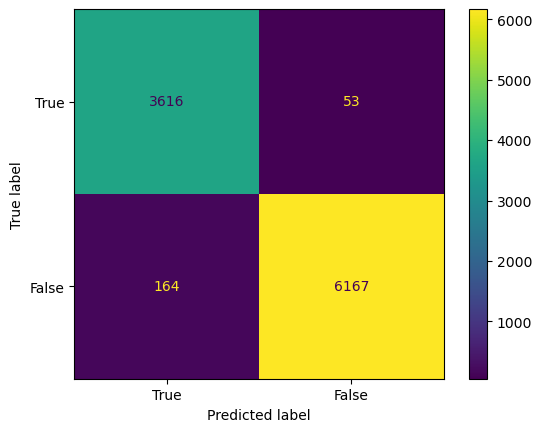

In [56]:
# This code is from W3Schools' website
from sklearn import metrics

confusion_matrix = confusion_matrix(y, model.predict(x))

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels=[True, False])

cm_display.plot()
plt.show()

In [57]:
print(f'The accuracy calculation is {model.score(x, y)*100}%.')

The accuracy calculation is 97.83%.


#### E3. Code

The code can be found throughout the document.

### PART V: DATA SUMMARY AND IMPLICATIONS

#### F1. Results

Based on the Logit Regression Results from part D3, the regression equation would be:

y = 63.8682 - 0.6541*(Complication_risk) - 1.1537*(Initial_days) + 0.7572*(Anxiety) + 0.9475*(Arthritis) - 0.3654*(BackPain) - 0.4366*(Diabetes) - 0.7350*(Highblood) - 0.3260*(Hyperlipidemia) - 1.4028*(Stroke) - 0.3854*(Widowed).

If all else is kept constant, the coefficients indicates that:

<ul>
    <li>The ‘Complication_risk’ coefficient tells us that a patient with higher risk decreases the odds of not being readmitted.</li>
    <li>The ‘Initial_days’ coefficient tell us that the longer the duration of the initial days the lower the odds of not being readmitted</li>
    <li>The ‘Anxiety’ coefficient tell us that a patient that suffers from anxiety has a higher odd of not being readmitted</li>
    <li>The ‘Arthritis’ coefficient tells us that a patient that suffers from arthritis has a higher odd of not being readmitted</li>
    <li>The ‘BackPain’ coefficient tells us that a patient that suffers from back pain has lower odds of not being readmitted</li>
    <li>The ‘Diabetes’ coefficient tells us that a patient that has diabetes has lower odds of not being readmitted</li>
    <li>The ‘Highblood’ coefficient tells us that a patient that has high blood pressure has lower odds of not being readmitted</li>
    <li>The ‘Hyperlipidemia’ coefficient tells us that a patient that has hyperlipidemia has lower odds of not being readmitted</li>
    <li>The ‘Stroke’ coefficient tells us that patients that have suffered from a stroke have lower odd of not being readmitted</li>
    <li>The ‘Widowed’ coefficient tells us that widowed patients have a lower odd of not being readmitted</li>
</ul>

Based on the reduced model's Pseudo R-Squared value of 0.9351, this implies that the model has statistical significance.  This implies that the selected explanatory variables used in the reduced regression model appropriately models the data.

However, the statistical significance doesn't imply practical significance.  Based on the y-intercept, it doesn't make sense that before any variables are taken into account, the customer is highly unlikely to be readmitted when most of the independent variables make it more probable that the patient will be readmitted.  The model applies, nonsensically, that suffering from anxiety and/or arthritis reduces the probability that the patient would be readmitted.

A limitation of this data analysis is that more information is needed regarding the target variable, 'ReAdmis'.  The data definitions don't specify if 'Yes' indicates that readmission is relating to ongoing issues from the initial admission or not.  If, for example, the patient is readmitted for a non-related medical issue but they're flagged as a readmitted patient, this analysis will misinterpret the results.

Another limitation of the analysis is 'Age', which has a range of 18 to 89.  If the logistic regression is correct, then it would only be effective in predicting readmission for patients that fall within thie age range.

#### F2. Recommendations

Based on the results of the logistic regression analysis, my recommendation is that we need to explore ways to decrease the days of the patient's initial stay as this is one of the highest coefficients in the regression model that increases the probability that the patient will be readmitted.  We may need more data surrounding what cause increases to the patient's days of initial days.

### PART VI: DEMONSTRATION

#### G. Provide a Panopto Video Recording

https://wgu.hosted.panopto.com/Panopto/Pages/Viewer.aspx?id=5a0dfb90-86ea-45c5-b5b1-b049003139a8

#### H. THIRD-PARTY CODE REFERENCES

Apeksharustagi1998 (unknown). <i>Python | Sort the list alphabetically in a dictionary</i>. Geeks for Geeks. 
    </br>&emsp;&emsp;Retrieved July 22, 2023, from https://www.geeksforgeeks.org/python-sort-the-list-alphabetically-in-a-dictionary/

Middleton, Dr. Keiona (2022). <i>D208 - Webinar: Getting Started with D208 Part I (November 2022)</i> [Webinar].
    </br>&emsp;&emsp;Western Governors University. https://wgu.hosted.panopto.com/Panopto/Pages/Viewer.aspx?id=15e09c73-c5aa-439d-852f-af47001b8970
    
Middleton, Dr. Keiona (2022). <i>D208 - Webinar: Getting Started with D208 Part II (November)</i> [Webinar].
    </br>&emsp;&emsp;Western Governors University. https://wgu.hosted.panopto.com/Panopto/Pages/Viewer.aspx?id=39bbe2db-de7d-4bf5-913b-af5c0003da9d
    
Patil, Dhiraj (2020, July 22). <i>Mosaic Plot in Python</i>. Medium. 
    </br>&emsp;&emsp;Retrieved July 22, 2023, from https://medium.com/analytics-vidhya/hello-everyone-4f9400e008dc
    
Parasmadan (unknown). <i>Get a list of a particular column values of a Pandas DataFrame</i>. Geeks for Geeks. 
    </br>&emsp;&emsp;Retrieved July 22, 2023, from https://www.geeksforgeeks.org/get-a-list-of-a-particular-column-values-of-a-pandas-dataframe/

Sewell, Dr. William (2017). <i>Dr. Sewell D208_Predictive_Modeling_Webinar_Episode 1t</i> [PowerPoint Slide 27].
    </br>&emsp;&emsp;Western Governors University. https://westerngovernorsuniversity.sharepoint.com/sites/DataScienceTeam/Shared%20Documents/Forms/AllItems.aspx?csf=1&web=1&e=9ccodm&cid=b8189c62%2D0063%2D4435%2Db439%2D04b9108b3e81&RootFolder=%2Fsites%2FDataScienceTeam%2FShared%20Documents%2FGraduate%20Team%2FD208%2FStudent%20Facing%20Resources&FolderCTID=0x01200022092E63FD85A64A8ABFB4F5AEA4839A

Striver (unknown). <i>Python | Get unique values from a list</i>. Geeks for Geeks. 
    </br>&emsp;&emsp;Retrieved July 22, 2023, from https://www.geeksforgeeks.org/python-get-unique-values-list/
    
W3Schools (Unknown).  <i>Machine Learning - Confusion Matrix</i>.
     </br>&emsp;&emsp;Retrieved July 22, 2023, from https://www.w3schools.com/python/python_ml_confusion_matrix.asp#:~:text=In%20order%20to%20create%20the,metrics%20from%20the%20sklearn%20module.&text=Once%20metrics%20is%20imported%20we,our%20actual%20and%20predicted%20values.&text=To%20create%20a%20more%20interpretable,into%20a%20confusion%20matrix%20display.

#### I. SOURCES

Nishalmendekarhere (2021, January 17).  <i>It's all about Assumptions, Pros & Cons</i>.  Medium.
    </br>&emsp;&emsp;Retrieved July 26, 2023, from https://medium.com/swlh/its-all-about-assumptions-pros-cons-497783cfed2d

Sewell, Dr. William (2017). <i>Dr. Sewell D208_Predictive_Modeling_Webinar_Episode 5</i> [PowerPoint Slides 1 - 12].
    </br>&emsp;&emsp;Western Governors University. https://westerngovernorsuniversity.sharepoint.com/:p:/r/sites/DataScienceTeam/_layouts/15/Doc.aspx?sourcedoc=%7B39646821-D496-4ECC-970A-AE2408B780F7%7D&file=Dr.%20Sewell%20D208_Predictive_Modeling_Webinar_Episode%205.pptx&action=edit&mobileredirect=true